In [202]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [203]:
# Import our input dataset
ny_df = pd.read_csv('column_listings_df.csv')
ny_df.head()

,listing_id,listing_url,name,host_id,host_url,host_name,host_since,host_is_superhost,host_listings_count,host_total_listings_count,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,52702018,https://www.airbnb.com/rooms/52702018,Rental unit in Queens · ★4.90 · 1 bedroom · 2 ...,93231383,https://www.airbnb.com/users/show/93231383,Daniel,2016-09-03,t,3.0,3.0,...,2023-08-21,4.90,4.95,4.90,4.95,4.94,4.85,4.87,3,8.53
1,784969376930125242,https://www.airbnb.com/rooms/784969376930125242,Home in Queens · ★4.97 · 3 bedrooms · 4 beds ·...,93231383,https://www.airbnb.com/users/show/93231383,Daniel,2016-09-03,t,3.0,3.0,...,2023-08-15,4.97,4.97,4.97,4.95,4.95,4.84,4.87,3,4.47
2,9919728,https://www.airbnb.com/rooms/9919728,Townhouse in Queens · ★4.33 · 3 bedrooms · 7 b...,50997424,https://www.airbnb.com/users/show/50997424,Mark,2015-12-10,f,10.0,10.0,...,2020-02-18,4.33,4.17,4.33,4.83,4.67,4.83,4.33,7,0.09
3,53696990,https://www.airbnb.com/rooms/53696990,Vacation home in Queens · Studio · 2 beds · 1 ...,50997424,https://www.airbnb.com/users/show/50997424,Mark,2015-12-10,f,10.0,10.0,...,2022-09-16,4.00,4.00,3.00,5.00,4.00,5.00,3.00,7,0.08
4,9920363,https://www.airbnb.com/rooms/9920363,Townhouse in Queens · ★4.25 · 5 bedrooms · 11 ...,50997424,https://www.airbnb.com/users/show/50997424,Mark,2015-12-10,f,10.0,10.0,...,2020-01-01,4.25,4.25,3.75,4.75,4.00,4.75,4.50,7,0.09


In [204]:
ny_df.columns

Index(['listing_id', 'listing_url', 'name', 'host_id', 'host_url', 'host_name',
       'host_since', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude', 'room_type',
       'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities',
       'price', 'minimum_nights', 'maximum_nights', 'has_availability',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

In [205]:
ny_df=ny_df[['latitude','longitude','neighbourhood_group_cleansed','beds','review_scores_rating','price']]
ny_df=pd.get_dummies(ny_df, columns=['neighbourhood_group_cleansed'], prefix=['neighbourhood_group_cleansed'])

ny_df['price']= ny_df['price'].str.extract('(\d+\.\d+|\d+)').astype(float)
ny_df = ny_df[ny_df['price'] <= 600]
ny_df.head(3)

,latitude,longitude,beds,review_scores_rating,price,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens
0,40.769110,-73.870530,2.0,4.90,171.0,0,0,1
1,40.768176,-73.871263,4.0,4.97,311.0,0,0,1
2,40.717340,-73.878050,7.0,4.33,328.0,0,0,1


In [206]:
ny_df = ny_df.dropna()

In [207]:
y = ny_df['price']
X = ny_df.drop(['price'], axis=1)

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [208]:
train_data=X_train.join(y_train)

In [209]:
train_data

,latitude,longitude,beds,review_scores_rating,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,price
3419,40.680370,-73.890520,3.0,4.35,1,0,0,166.0
4394,40.596710,-73.794900,3.0,4.75,0,0,1,275.0
23181,40.777200,-73.985440,1.0,4.91,0,1,0,105.0
21499,40.759550,-73.988340,1.0,0.00,0,1,0,150.0
12068,40.708650,-73.936490,1.0,4.78,1,0,0,77.0
...,...,...,...,...,...,...,...,...
6900,40.661510,-73.993620,3.0,5.00,1,0,0,135.0
10958,40.814529,-73.942752,1.0,4.81,0,1,0,245.0
25591,40.772170,-73.958360,2.0,4.61,0,1,0,165.0
15279,40.715091,-73.963802,1.0,5.00,1,0,0,175.0


array([[<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'beds'}>],
       [<Axes: title={'center': 'review_scores_rating'}>,
        <Axes: title={'center': 'neighbourhood_group_cleansed_Brooklyn'}>,
        <Axes: title={'center': 'neighbourhood_group_cleansed_Manhattan'}>],
       [<Axes: title={'center': 'neighbourhood_group_cleansed_Queens'}>,
        <Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

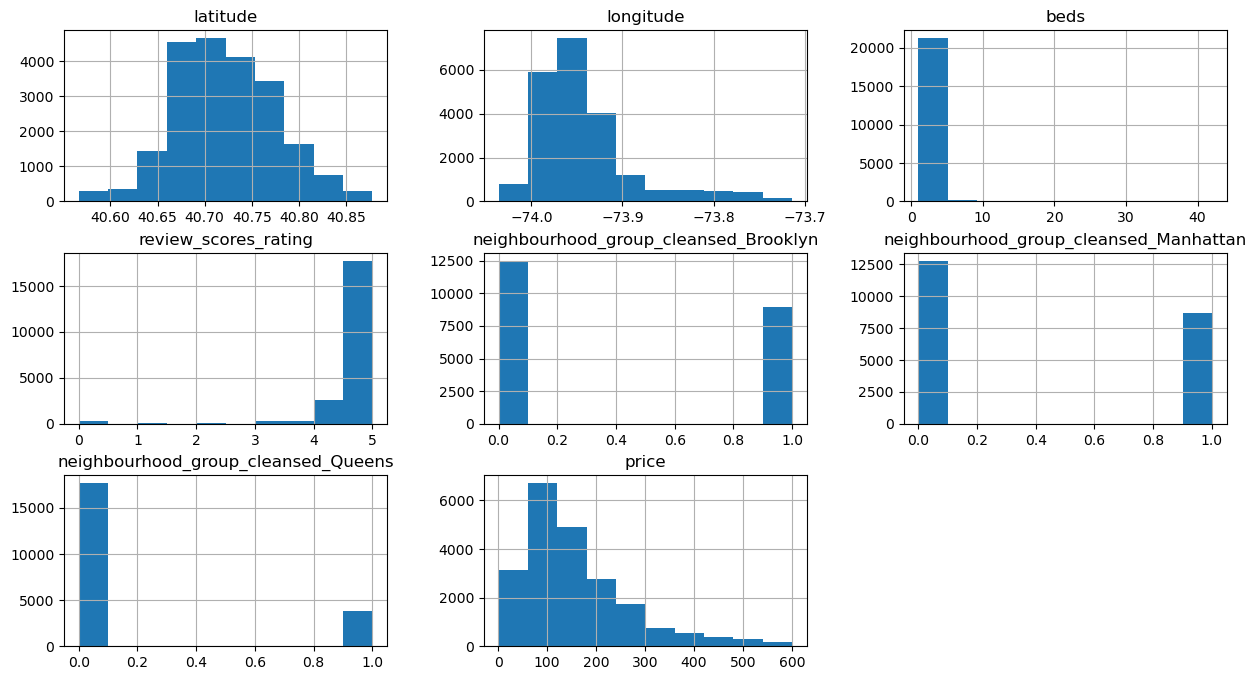

In [210]:
train_data.hist(figsize=(15,8))

In [211]:
train_data.corr()

,latitude,longitude,beds,review_scores_rating,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,price
latitude,1.000000,-0.131090,-0.080998,-0.054289,-0.675727,0.672367,0.008534,0.042286
longitude,-0.131090,1.000000,0.093215,0.015919,-0.092159,-0.481440,0.739330,-0.223646
beds,-0.080998,0.093215,1.000000,0.033639,0.024166,-0.067855,0.056118,0.346851
review_scores_rating,-0.054289,0.015919,0.033639,1.000000,0.042630,-0.048893,0.007801,0.076737
neighbourhood_group_cleansed_Brooklyn,-0.675727,-0.092159,0.024166,0.042630,1.000000,-0.700033,-0.392562,-0.111212
neighbourhood_group_cleansed_Manhattan,0.672367,-0.481440,-0.067855,-0.048893,-0.700033,1.000000,-0.381980,0.229019
neighbourhood_group_cleansed_Queens,0.008534,0.739330,0.056118,0.007801,-0.392562,-0.381980,1.000000,-0.151036
price,0.042286,-0.223646,0.346851,0.076737,-0.111212,0.229019,-0.151036,1.000000


<Axes: >

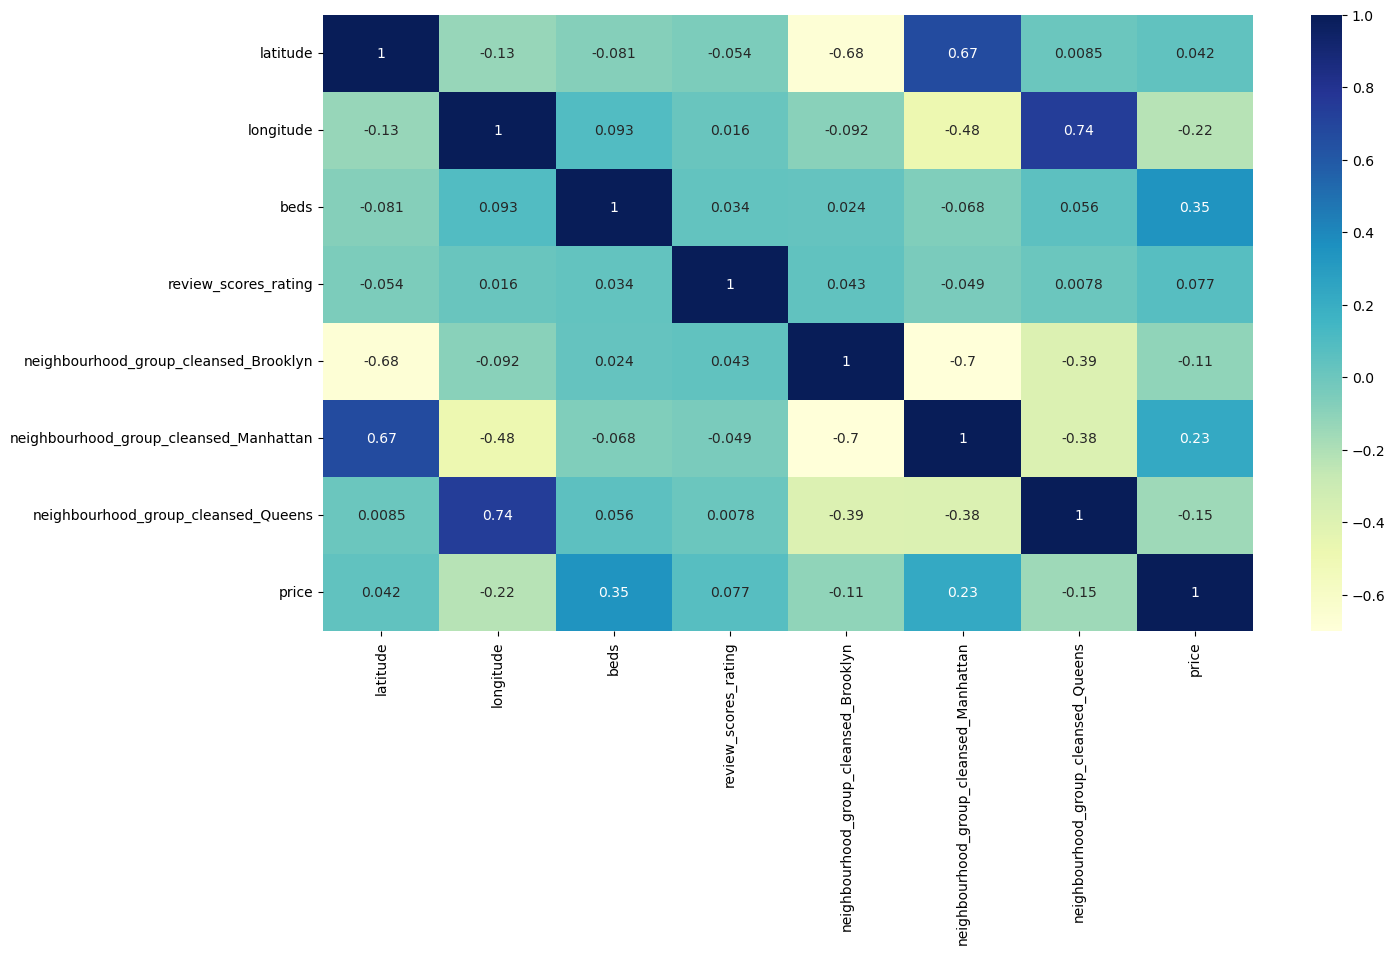

In [212]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

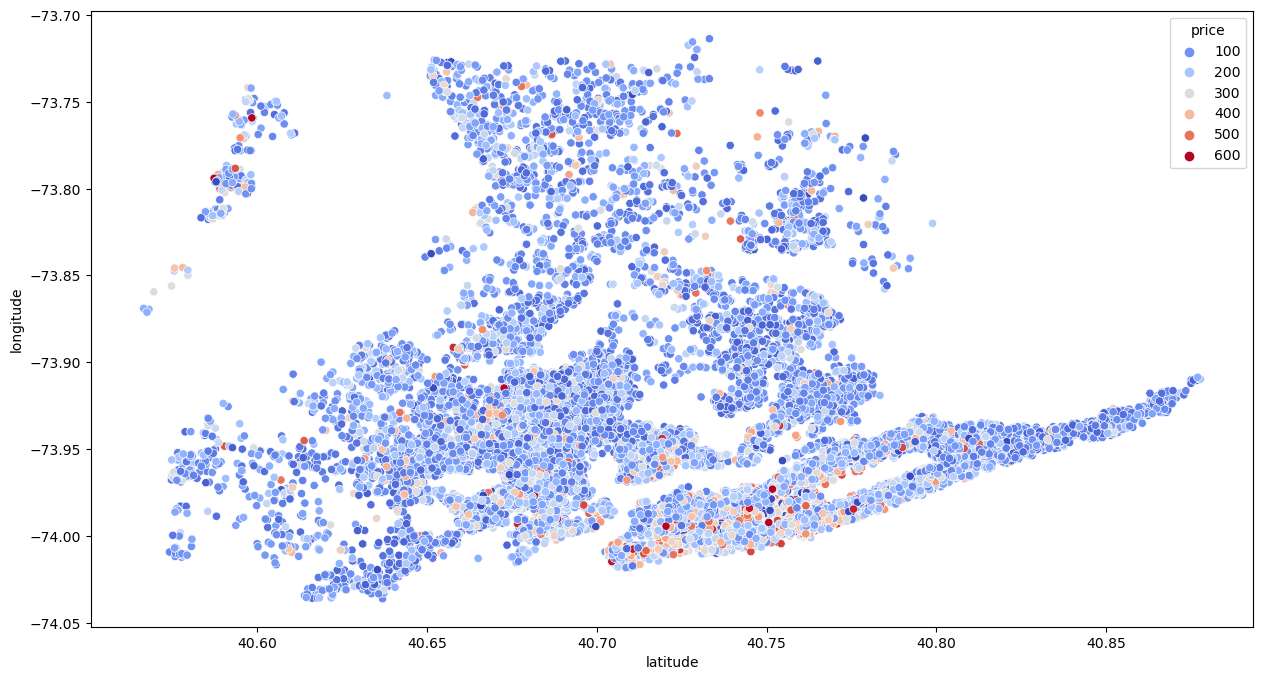

In [213]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='price', palette='coolwarm')

LogisticRegression

In [214]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [219]:
X_train, y_train = ny_df.drop(['price','latitude','longitude'],axis=1), ny_df['price']

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [221]:
X_test, y_test = ny_df.drop(['price','latitude','longitude'],axis=1), ny_df['price']
test_data = X_test.join(y_test)
test_data

,beds,review_scores_rating,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,price
0,2.0,4.90,0,0,1,171.0
1,4.0,4.97,0,0,1,311.0
2,7.0,4.33,0,0,1,328.0
3,2.0,4.00,0,0,1,139.0
4,11.0,4.25,0,0,1,485.0
...,...,...,...,...,...,...
27701,2.0,4.57,0,1,0,200.0
27702,2.0,1.00,0,1,0,150.0
27703,1.0,4.87,1,0,0,95.0
27704,2.0,5.00,0,1,0,250.0


In [224]:
X_train, y_train = ny_df.drop(['price','latitude','longitude'],axis=1), ny_df['price']
train_data=X_train.join(y_train)
train_data

,beds,review_scores_rating,neighbourhood_group_cleansed_Brooklyn,neighbourhood_group_cleansed_Manhattan,neighbourhood_group_cleansed_Queens,price
0,2.0,4.90,0,0,1,171.0
1,4.0,4.97,0,0,1,311.0
2,7.0,4.33,0,0,1,328.0
3,2.0,4.00,0,0,1,139.0
4,11.0,4.25,0,0,1,485.0
...,...,...,...,...,...,...
27701,2.0,4.57,0,1,0,200.0
27702,2.0,1.00,0,1,0,150.0
27703,1.0,4.87,1,0,0,95.0
27704,2.0,5.00,0,1,0,250.0


In [225]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (26819, 5)
y_test shape: (26819,)


In [226]:
print("Missing values in X_test:")
print(X_test.isnull().sum())

print("Missing values in y_test:")
print(y_test.isnull().sum())

Missing values in X_test:
beds                                      0
review_scores_rating                      0
neighbourhood_group_cleansed_Brooklyn     0
neighbourhood_group_cleansed_Manhattan    0
neighbourhood_group_cleansed_Queens       0
dtype: int64
Missing values in y_test:
0


In [227]:
reg.score(X_test,y_test)

0.19420848087142506

In [228]:
# Assuming you already have predictions for the test dataset
y_pred = reg.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 98.87803872241183


In [229]:
# Score the model
print(f"Training Data Score: {reg.score(X_train, y_train)}")
print(f"Testing Data Score: {reg.score(X_test, y_test)}")

Training Data Score: 0.19420848087142506
Testing Data Score: 0.19420848087142506


#Deep Learning

In [238]:
nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units=70, activation="relu", input_dim=5))
nn.add(tf.keras.layers.Dense(units=70, activation="relu"))
nn.add(tf.keras.layers.Dense(units=70, activation="relu"))
nn.add(tf.keras.layers.Dense(units=70, activation="relu"))
nn.add(tf.keras.layers.Dense(units=70, activation="relu"))
nn.add(tf.keras.layers.Dense(units=70, activation="relu"))
nn.add(tf.keras.layers.Dense(units=70, activation="relu"))
nn.add(tf.keras.layers.Dense(units=1))

nn.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 70)                420       
                                                                 
 dense_42 (Dense)            (None, 70)                4970      
                                                                 
 dense_43 (Dense)            (None, 70)                4970      
                                                                 
 dense_44 (Dense)            (None, 70)                4970      
                                                                 
 dense_45 (Dense)            (None, 70)                4970      
                                                                 
 dense_46 (Dense)            (None, 70)                4970      
                                                                 
 dense_47 (Dense)            (None, 70)              

In [239]:
nn.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

In [240]:
#fit_model = nn.fit(X_train,y_train,epochs=30)

fit_model = nn.fit(X_train, y_train, epochs=100, validation_split=0.2) 

Epoch 1/100
671/671 [==============================] - 2s 2ms/step - loss: 11700.8584 - mean_absolute_error: 77.5483 - val_loss: 9142.0537 - val_mean_absolute_error: 75.2285
Epoch 2/100
671/671 [==============================] - 1s 1ms/step - loss: 10077.7246 - mean_absolute_error: 71.8223 - val_loss: 8223.8564 - val_mean_absolute_error: 65.4629
Epoch 3/100
671/671 [==============================] - 1s 1ms/step - loss: 9871.6826 - mean_absolute_error: 71.4613 - val_loss: 9187.6963 - val_mean_absolute_error: 75.8992
Epoch 4/100
671/671 [==============================] - 1s 1ms/step - loss: 9834.7217 - mean_absolute_error: 71.3486 - val_loss: 8411.1621 - val_mean_absolute_error: 63.7212
Epoch 5/100
671/671 [==============================] - 1s 1ms/step - loss: 9829.8652 - mean_absolute_error: 71.4476 - val_loss: 8675.7617 - val_mean_absolute_error: 72.1396
Epoch 6/100
671/671 [==============================] - 1s 1ms/step - loss: 9767.4580 - mean_absolute_error: 71.3254 - val_loss: 8215.

In [236]:
test_loss, test_mae = nn.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

839/839 [==============================] - 1s 858us/step - loss: 9316.3389 - mean_absolute_error: 70.9359
Test Loss: 9316.3388671875, Test MAE: 70.93586730957031


In [237]:
# Calculate predictions using the deep learning model
y_pred_nn = nn.predict(X_test)

# Calculate Mean Squared Error (MSE) for the deep learning model
mse_nn = mean_squared_error(y_test, y_pred_nn)

# Calculate Root Mean Squared Error (RMSE) for the deep learning model
rmse_nn = np.sqrt(mse_nn)

# Calculate R-squared for the deep learning model
r2_nn = r2_score(y_test, y_pred_nn)

print("Deep Learning Model - Root Mean Squared Error (RMSE):", rmse_nn)
print("Deep Learning Model - R-squared:", r2_nn)

839/839 [==============================] - 1s 715us/step
Deep Learning Model - Root Mean Squared Error (RMSE): 96.52118709369861
Deep Learning Model - R-squared: 0.23216427541433038
